## Regression Prediction

Desc: This notebook serves as a template for regression problems.

In this example, we will be using the baseball player salary dataset. 

## Import the Hitters Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
# import data
hitters = pd.read_csv("Hitters.csv", na_values="?").dropna()

In [3]:
# print the first five lines
hitters.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


In [4]:
# list basic info
hitters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  263 non-null    object 
 1   AtBat       263 non-null    int64  
 2   Hits        263 non-null    int64  
 3   HmRun       263 non-null    int64  
 4   Runs        263 non-null    int64  
 5   RBI         263 non-null    int64  
 6   Walks       263 non-null    int64  
 7   Years       263 non-null    int64  
 8   CAtBat      263 non-null    int64  
 9   CHits       263 non-null    int64  
 10  CHmRun      263 non-null    int64  
 11  CRuns       263 non-null    int64  
 12  CRBI        263 non-null    int64  
 13  CWalks      263 non-null    int64  
 14  League      263 non-null    object 
 15  Division    263 non-null    object 
 16  PutOuts     263 non-null    int64  
 17  Assists     263 non-null    int64  
 18  Errors      263 non-null    int64  
 19  Salary      263 non-null    f

## Explore the dataset

### Plot the distribution of the variables 

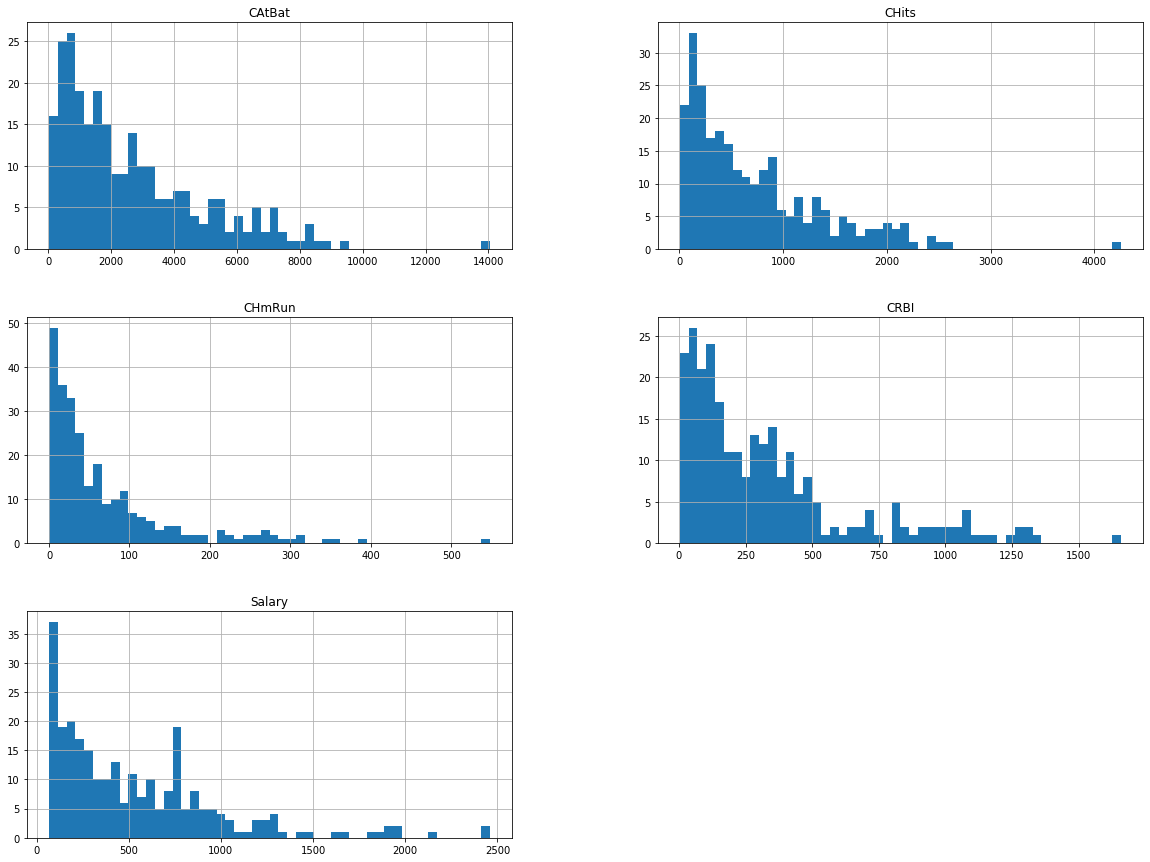

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
hitters[["CAtBat", "CHits", "CHmRun", "CRBI", 'Salary']].hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

Variables are all right skewed. It would be better to take the log of the variables. For the purpose of simplicity, here, we only apply log transformation on the y variable.

In [6]:
import numpy as np
hitters["logSalary"] = np.log(hitters["Salary"]+1)

In [7]:
hitters["Salary"].describe()

count     263.000000
mean      535.925882
std       451.118681
min        67.500000
25%       190.000000
50%       425.000000
75%       750.000000
max      2460.000000
Name: Salary, dtype: float64

In [8]:
# if you wish to convert salary to binary variable

# def partition(x):
#     if x < 536:
#         return 0
#     return 1
# sale['highSalary'] = sale["Salary"].map(partition)

# sale['highSalary2'] = sale["Salary"].apply(lambda x: 0 if x < 536 else 1)

In [9]:
# convert object type to numeric values
print(hitters["League"].value_counts())
print(hitters["Division"].value_counts())

A    139
N    124
Name: League, dtype: int64
W    134
E    129
Name: Division, dtype: int64


In [10]:
# you can generate the numbers automatically
hitters.League = pd.factorize(hitters.League)[0]

# you can also generate the numbers by hardcoding
hitters["Division"] = hitters.Division.map({'W':0, 'E':1})

# alternative approach
# hitters.loc[hitters["Division"] == "W", "Division2"] = 0
# hitters.loc[hitters["Division"] == "E", "Division2"] = 1


In [11]:
# if there are missing values, you can fill missing values with medians
# hitters["Age"] = hitters["Age"].fillna(hitters["Age"].median())


# remove special signs
# hitters["Age"] = hitters["Age"].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)

In [12]:
# Create the x and y variables
xlist = ["CAtBat", "CHits", "CHmRun", "CRBI", "League", "Division"]
X = hitters[xlist]
y = hitters["logSalary"]

In [13]:
# drag and drop pivot table 
# pivot_ui(hitters)

# describe the X variables
hitters[xlist].describe()

,CAtBat,CHits,CHmRun,CRBI,League,Division
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,2657.543726,722.186312,69.239544,330.418251,0.528517,0.490494
std,2286.582929,648.199644,82.197581,323.367668,0.500138,0.500863
min,19.000000,4.000000,0.000000,3.000000,0.000000,0.000000
25%,842.500000,212.000000,15.000000,95.000000,0.000000,0.000000
50%,1931.000000,516.000000,40.000000,230.000000,1.000000,0.000000
75%,3890.500000,1054.000000,92.500000,424.500000,1.000000,1.000000
max,14053.000000,4256.000000,548.000000,1659.000000,1.000000,1.000000


## Divide the dataset into train and test sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

In [15]:
X_train.head()

,CAtBat,CHits,CHmRun,CRBI,League,Division
213,344,76,3,36,0,1
204,2051,549,62,263,1,0
152,278,86,4,38,0,0
62,1115,270,1,64,1,0
304,4086,1150,57,363,0,0


## Apply a linear regression model

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

# create a new column for the predicted salary
hitters["reg_predict"] = reg.predict(X)

In [17]:
# This part can print out the p-values for the variables

import statsmodels.api as sm
import statsmodels.regression.linear_model as smf
results = smf.OLS(y_train,X_train).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              logSalary   R-squared (uncentered):                   0.818
Model:                            OLS   Adj. R-squared (uncentered):              0.812
Method:                 Least Squares   F-statistic:                              133.4
Date:                Wed, 15 Apr 2020   Prob (F-statistic):                    3.75e-63
Time:                        19:03:29   Log-Likelihood:                         -434.50
No. Observations:                 184   AIC:                                      881.0
Df Residuals:                     178   BIC:                                      900.3
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [18]:
# Model Evaluation2: Calculate Root Mean Square Error (RMSE)
y_pred = reg.predict(X_test)
reg_mse = mean_squared_error(y_pred, y_test)
reg_rmse = np.sqrt(reg_mse)
print('Liner Regression RMSE: %.4f' % reg_rmse)

Liner Regression RMSE: 0.7173


In [19]:
# Model Evaluation3: Calculate mean absolute error (MAE)
lin_mae = mean_absolute_error(y_pred, y_test)
print('Liner Regression MAE: %.4f' % lin_mae)

Liner Regression MAE: 0.5924


## Apply a decision tree model

In [20]:
regrtree = DecisionTreeRegressor(max_leaf_nodes = 3)
regrtree.fit(X_train, y_train)

hitters["tree_predict"] = regrtree.predict(X)

In [21]:
y_pred_tree = regrtree.predict(X_test)
tree_mse = mean_squared_error(y_pred_tree, y_test)
tree_rmse = np.sqrt(tree_mse)
print('Decision Tree RMSE: %.4f' % tree_rmse)

Decision Tree RMSE: 0.7262


In [22]:
# Model Evaluation3: Calculate mean absolute error (MAE)
tree_mae = mean_absolute_error(y_pred_tree, y_test)
print('Decision Tree MAE: %.4f' % tree_mae)

Decision Tree MAE: 0.5245


In [23]:
# print out the tree image and the variable importance scores



## Random forest model

You may also print out the variable importance scores.

In [24]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

y_pred_forest = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred_forest, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

forest_mae = mean_absolute_error(y_pred_forest, y_test)
print('Random Forest MAE: %.4f' % forest_mae)

# you may also print out variable importance scores.

Random Forest RMSE: 0.4320
Random Forest MAE: 0.3301


## K-nearest Neighbor

In [25]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

## Apply a neural network model

In [26]:
# To improve the neural network performance, normalize the input variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_nn = scaler.transform(X_train)
X_test_nn = scaler.transform(X_test)

In [27]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(30,30,30), max_iter=2000)
mlp.fit(X_train_nn,y_train)

hitters["mlp_predict"] = mlp.predict(X)

In [28]:
y_pred_mlp = mlp.predict(X_test_nn)
mlp_mse = mean_squared_error(y_pred_mlp, y_test)
mlp_rmse = np.sqrt(mlp_mse)
print('Neural Network RMSE: %.4f' % mlp_rmse)

Neural Network RMSE: 0.4981


In [29]:
# Model Evaluation3: Calculate mean absolute error (MAE)
mlp_mae = mean_absolute_error(y_pred_mlp, y_test)
print('Neural Network MAE: %.4f' % mlp_mae)

Neural Network MAE: 0.3787


## Apply a Support Vector Machine

In [30]:
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

from sklearn.svm import SVR
svr = SVR(kernel = 'linear')
svr.fit(X_train, y_train)





SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)